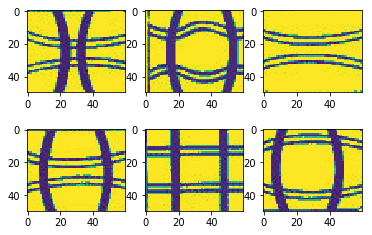

In [18]:
import matplotlib.pyplot as plt
from PIL import Image
import os
import sys
import random
import math
import re
import time
import numpy as np
def ans_cut(N):
    a=Image.open('/Users/sofiadunlosky/Downloads/ilovepdf_images-extracted/img'+N+'.jpg')
    pic=np.zeros((50,60,6))
    n=0
    m=-10
    m1=2
    pic[:,:,0]=np.array(a)[225+m:275+m,15+n:75+n,0]
    pic[:,:,3]=np.array(a)[298+m1:348+m1,15+n:75+n,0]
    pic[:,:,1]=np.array(a)[225+m:275+m,125+n:185+n,0]
    pic[:,:,4]=np.array(a)[298+m1:348+m1,125+n:185+n,0]
    pic[:,:,2]=np.array(a)[225+m:275+m,235+n:295+n,0]
    pic[:,:,5]=np.array(a)[298+m1:348+m1,235+n:295+n,0]
    p=np.array(a)[100:150,110:170,0]
    for i in range (0,6):
        plt.subplot(2,3,i+1)
        plt.imshow(pic[:,:,i])
    return p,pic,a
p,pic,a=ans_cut('98')


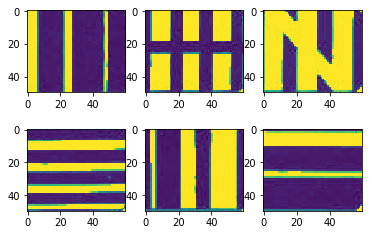

In [71]:
import matplotlib.pyplot as plt
from PIL import Image
import os
import sys
import random
import math
import re
import time
import numpy as np
def ans_cut(N):
    a=Image.open('/Users/sofiadunlosky/Downloads/ilovepdf_images-extracted/img'+N+'.jpg')
    pic=np.zeros((50,60,6))
    n=6
    m=-4
    m1=1
    pic[:,:,0]=np.array(a)[225+m:275+m,15+n:75+n]
    pic[:,:,3]=np.array(a)[298+m1:348+m1,15+n:75+n]
    pic[:,:,1]=np.array(a)[225+m:275+m,125+n:185+n]
    pic[:,:,4]=np.array(a)[298+m1:348+m1,125+n:185+n]
    pic[:,:,2]=np.array(a)[225+m:275+m,235+n:295+n]
    pic[:,:,5]=np.array(a)[298+m1:348+m1,235+n:295+n]
    p=np.array(a)[100:150,110:170]
    for i in range (0,6):
        plt.subplot(2,3,i+1)
        plt.imshow(pic[:,:,i])
    return p,pic,a
p,pic,a=ans_cut('75')



In [11]:
np.array(a).shape

(362, 344, 3)

In [7]:
a=Image.open('/Users/sofiadunlosky/Downloads/ilovepdf_images-extracted/img'+'75'+'.jpg')
np.array(a).shape

(362, 337)

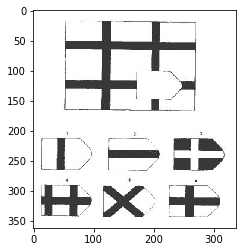

In [9]:
plt.imshow(np.array(a))

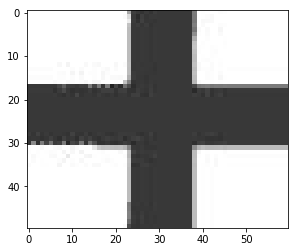

In [14]:
plt.imshow(np.array(a)[100:150,90:150,:])

In [35]:
pic[:,:,0]

array([[192., 255., 255., ..., 250., 255., 253.],
       [197., 255., 255., ..., 255., 255., 255.],
       [252., 255., 255., ..., 255., 255., 255.],
       ...,
       [255., 255., 255., ..., 255., 255., 255.],
       [250., 255., 255., ..., 255., 245., 255.],
       [126., 126., 126., ..., 200., 171., 255.]])

In [49]:
b=np.array(a)[100:150,90:150,0].copy()
b[10:50,10:50]=np.array(a)[110:150,90:130,0]
c=np.array(a)[100:150,90:150,0].copy()
c[15:50,10:50]=np.array(a)[115:150,90:130,0]
d=np.array(a)[100:150,90:150,0].copy()
d[10:40,10:50]=pic[:,:,0][10:40,10:50]
e=np.array(a)[100:150,90:150,0].copy()
e[10:40,10:50]=pic[:,:,3][10:40,10:50]
f=np.array(a)[100:150,90:150,0].copy()
f[10:40,10:50]=pic[:,:,2][10:40,10:50]
pic1=np.zeros((50,60,6))
pic1[:,:,0]=np.array(a)[100:150,90:150,0]
pic1[:,:,1]=b
pic1[:,:,2]=c
pic1[:,:,3]=d
pic1[:,:,4]=e
pic1[:,:,5]=f

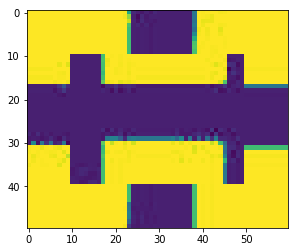

In [48]:
plt.imshow(e)

In [13]:
np.save('p.npy',p)

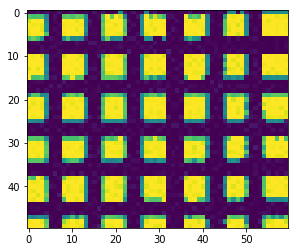

In [7]:
plt.imshow(p)

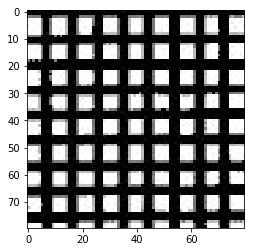

In [8]:
plt.imshow(np.array(a)[70:150,90:170,:])

In [1]:
from con import train_cov
from an import ans_cut
import numpy as np
p,pic,a=ans_cut('27')
w1,w2=train_cov(np.array(a)[70:150,90:170,0])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Step 1, Minibatch Loss= 7842.9053, Train Accuracy= 0.250
Step 10, Minibatch Loss= 6219.2139, Train Accuracy= 0.375
Step 20, Minibatch Loss= 34501.7031, Train Accuracy= 0.500
Step 30, Minibatch Loss= 0.0000, Train Accuracy= 1.000


In [4]:
import tensorflow as tf
from convo import conv2d, maxpool2d
def forward(p,pic,w1,w2):
    with tf.Session() as sess:
        p1=tf.reshape(p.astype('float64').reshape(1,3000)/255 , shape=[-1, 50,60 , 1])
        I=conv2d(p1, w1)
        I=maxpool2d(I,k=5)
        I1 = conv2d(I, w2)
        I1=maxpool2d(I1,k=5)
        I1=tf.reshape(I1,[-1,36]).eval()
    II2=np.zeros((6,36))
    with tf.Session() as sess:
        for i in range (0,6):
            p1=tf.reshape(pic[:,:,i].astype('float64').reshape(1,3000)/255 , shape=[-1, 50,60 , 1])
            II=conv2d(p1, w1)
            II=maxpool2d(II,k=5)
            II1 = conv2d(II, w2)
            II1=maxpool2d(II1,k=5)
            II1=tf.reshape(II1,[-1,36]).eval()
            II2[i,:]=II1
    return I1,II2

In [5]:

#from forw import forward
I1,II2=forward(p,pic,w1,w2)

NameError: global name 'np' is not defined

In [5]:
def compare(I1,II2):
    E=np.zeros(6)
    for i in range (0,6):
        E[i]=np.abs(II2[i,:]-I1).sum()
    E1=np.zeros(6)
    for i in range (0,6):
        E1[i]=(II2[i,:]-I1).sum()
    return E,E1

In [8]:
compare(I1,II2)

(array([ 379.81060199, 1508.04709066,  421.98680285, 1586.55528449,
        1509.90658158, 1508.50373731]),
 array([  196.63878453, -1508.04709066,   215.42386159, -1586.55528449,
        -1509.90658158, -1508.50373731]))

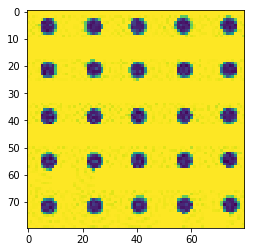

In [6]:
plt.imshow(np.array(a)[70:150,95:175,0])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Step 1, Minibatch Loss= 81324.4531, Train Accuracy= 0.375
Step 2, Minibatch Loss= 9861.6953, Train Accuracy= 0.750
Step 3, Minibatch Loss= 1622.2383, Train Accuracy= 0.625
Step 4, Minibatch Loss= 67271.7188, Train Accuracy= 0.250
Step 5, Minibatch Loss= 33963.1328, Train Accuracy= 0.750
Step 6, Minibatch Loss= 0.0000, Train Accuracy= 1.000


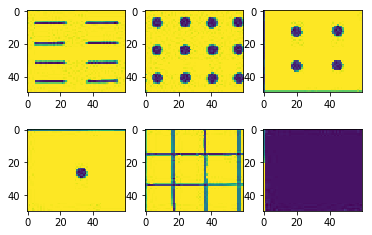

In [2]:
from con import train_cov
#from an import ans_cut
import numpy as np
p,pic,a=ans_cut('35')
w1,w2=train_cov(np.array(a)[70:150,95:175,0])

In [9]:
I1,II2=forward(p,pic,w1,w2)
compare(I1,II2)

(array([1011.87983396,  838.39543233, 1255.31948322, 2084.98556093,
        1502.18115112, 4673.26182341]),
 array([ -588.75522713,   316.952528  ,  -842.15335321, -1749.75419451,
         -841.33869849, -4521.84603058]))

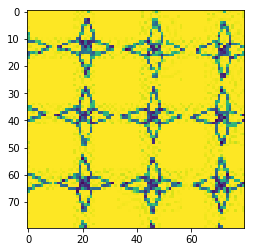

In [11]:
plt.imshow(np.array(a)[70:150,95:175,0])

Step 1, Minibatch Loss= 4011.7529, Train Accuracy= 0.875
Step 2, Minibatch Loss= 2097.5244, Train Accuracy= 0.875
Step 3, Minibatch Loss= 11328.0029, Train Accuracy= 0.375
Step 4, Minibatch Loss= 17558.6445, Train Accuracy= 0.500
Step 5, Minibatch Loss= 4641.2930, Train Accuracy= 0.500
Step 6, Minibatch Loss= 13694.9180, Train Accuracy= 0.750
Step 7, Minibatch Loss= 52890.8750, Train Accuracy= 0.250
Step 8, Minibatch Loss= 9071.6797, Train Accuracy= 0.750
Step 9, Minibatch Loss= 1275.4600, Train Accuracy= 0.875
Step 10, Minibatch Loss= 51510.6211, Train Accuracy= 0.000
Step 11, Minibatch Loss= 7450.5215, Train Accuracy= 0.750
Step 12, Minibatch Loss= 30939.6270, Train Accuracy= 0.625
Step 13, Minibatch Loss= 16184.3604, Train Accuracy= 0.375
Step 14, Minibatch Loss= 0.0000, Train Accuracy= 1.000


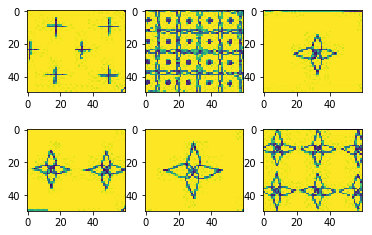

In [31]:
from con import train_cov
#from an import ans_cut
import numpy as np
p,pic,a=ans_cut('43')
w1,w2=train_cov(np.array(a)[70:150,95:175,0])

In [32]:
I1,II2=forward(p,pic,w1,w2)
compare(I1,II2)

(array([ 696.95708301,  529.28150293, 1006.95991592,  925.53981626,
         973.30689477,  509.73334782]),
 array([-475.568015  ,  173.80312357, -767.54902451, -410.39711939,
        -698.28083784,   32.82308769]))

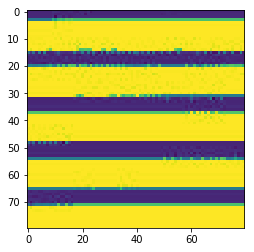

In [22]:
plt.imshow(np.array(a)[70:150,95:175,0])

Step 1, Minibatch Loss= 261184.0312, Train Accuracy= 0.125
Step 2, Minibatch Loss= 111852.2109, Train Accuracy= 0.250
Step 3, Minibatch Loss= 111170.9531, Train Accuracy= 0.500
Step 4, Minibatch Loss= 20095.0938, Train Accuracy= 0.125
Step 5, Minibatch Loss= 20555.8652, Train Accuracy= 0.750
Step 6, Minibatch Loss= 38431.8008, Train Accuracy= 0.500
Step 7, Minibatch Loss= 25695.2109, Train Accuracy= 0.875
Step 8, Minibatch Loss= 64451.3828, Train Accuracy= 0.625
Step 9, Minibatch Loss= 102616.7109, Train Accuracy= 0.625
Step 10, Minibatch Loss= 36041.9336, Train Accuracy= 0.875
Step 11, Minibatch Loss= 99470.6094, Train Accuracy= 0.625
Step 12, Minibatch Loss= 94595.3516, Train Accuracy= 0.625
Step 13, Minibatch Loss= 92058.1172, Train Accuracy= 0.625
Step 14, Minibatch Loss= 90765.5859, Train Accuracy= 0.500
Step 15, Minibatch Loss= 75510.4062, Train Accuracy= 0.625
Step 16, Minibatch Loss= 42172.5898, Train Accuracy= 0.750
Step 17, Minibatch Loss= 57611.2305, Train Accuracy= 0.750
St

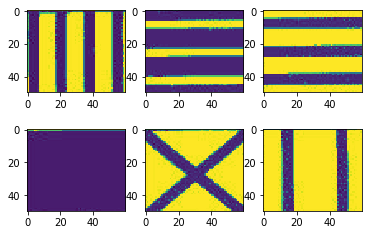

In [36]:
from con import train_cov
#from an import ans_cut
import numpy as np
p,pic,a=ans_cut('51')
w1,w2=train_cov(np.array(a)[70:150,95:175,0])

In [37]:
I1,II2=forward(p,pic,w1,w2)
compare(I1,II2)

(array([1248.90499548, 1530.77504609, 1771.80545591, 3883.7466154 ,
        1634.56738774, 1198.1373855 ]),
 array([-3.62318161e+02, -1.34117138e+02,  5.32645756e+02, -3.47425706e+03,
         6.57682124e+02, -2.00405254e+00]))

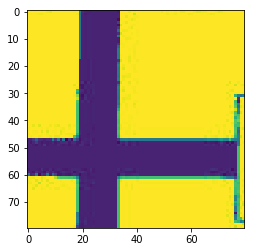

In [39]:
plt.imshow(np.array(a)[70:150,95:175,0])

Step 1, Minibatch Loss= 8571.0078, Train Accuracy= 0.375
Step 2, Minibatch Loss= 27619.2031, Train Accuracy= 0.000
Step 3, Minibatch Loss= 48256.9766, Train Accuracy= 0.625
Step 4, Minibatch Loss= 14413.6738, Train Accuracy= 0.375
Step 5, Minibatch Loss= 83698.3906, Train Accuracy= 0.500
Step 6, Minibatch Loss= 37247.2422, Train Accuracy= 0.625
Step 7, Minibatch Loss= 0.0000, Train Accuracy= 1.000


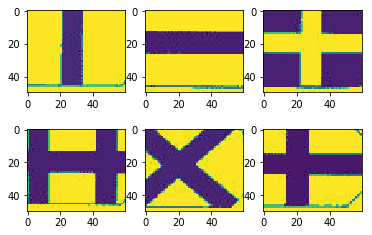

In [38]:
from con import train_cov
#from an import ans_cut
import numpy as np
p,pic,a=ans_cut('59')
w1,w2=train_cov(np.array(a)[70:150,95:175,0])

Step 1, Minibatch Loss= 245354.4375, Train Accuracy= 0.250
Step 2, Minibatch Loss= 33625.0625, Train Accuracy= 0.500
Step 3, Minibatch Loss= 23505.2402, Train Accuracy= 0.625
Step 4, Minibatch Loss= 92501.2969, Train Accuracy= 0.500
Step 5, Minibatch Loss= 79732.5859, Train Accuracy= 0.500
Step 6, Minibatch Loss= 105410.7891, Train Accuracy= 0.625
Step 7, Minibatch Loss= 37198.0859, Train Accuracy= 0.750
Step 8, Minibatch Loss= 18200.6895, Train Accuracy= 0.625
Step 9, Minibatch Loss= 34850.8711, Train Accuracy= 0.625
Step 10, Minibatch Loss= 34814.4141, Train Accuracy= 0.500
Step 11, Minibatch Loss= 27082.7227, Train Accuracy= 0.500
Step 12, Minibatch Loss= 36535.1797, Train Accuracy= 0.625
Step 13, Minibatch Loss= 64298.3125, Train Accuracy= 0.625
Step 14, Minibatch Loss= 14445.1201, Train Accuracy= 0.875
Step 15, Minibatch Loss= 40824.6289, Train Accuracy= 0.625
Step 16, Minibatch Loss= 24550.7812, Train Accuracy= 0.500
Step 17, Minibatch Loss= 10536.2148, Train Accuracy= 0.625
Step

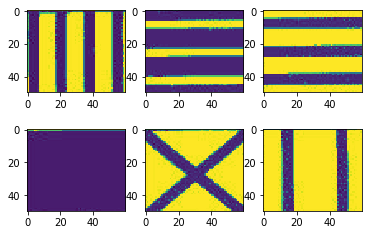

In [5]:
from con import train_cov
#from an import ans_cut
import numpy as np
p,pic,a=ans_cut('51')
w1,w2=train_cov(np.array(a)[70:150,95:175,0])

In [6]:
I1,II2=forward(p,pic,w1,w2)
compare(I1,II2)

(array([1469.22795828, 1827.90686962, 1108.64028479, 4041.7541367 ,
        1265.56799548, 1004.05671722]),
 array([   92.33063353,  -831.59834403,   -27.40155675, -3803.71993027,
           49.97845058,   177.56842922]))

Step 1, Minibatch Loss= 3427.9497, Train Accuracy= 0.625
Step 2, Minibatch Loss= 4000.4644, Train Accuracy= 0.625
Step 3, Minibatch Loss= 25636.7969, Train Accuracy= 0.500
Step 4, Minibatch Loss= 1464.3457, Train Accuracy= 0.250
Step 5, Minibatch Loss= 21203.8984, Train Accuracy= 0.625
Step 6, Minibatch Loss= 0.0000, Train Accuracy= 1.000


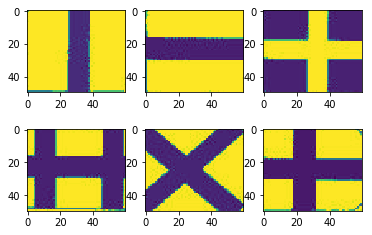

In [25]:
from con import train_cov
from an import ans_cut
import numpy as np
p,pic,a=ans_cut('59')
w1,w2=train_cov(np.array(a)[70:150,90:170,0])

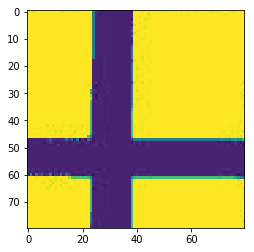

In [51]:
plt.imshow(np.array(a)[70:150,90:170,0])

In [50]:
I1,II2=forward(p,pic1,w1,w2)
compare(I1,II2)

(array([ 908.25998811,  999.23888586, 1099.22792159, 1309.83579871,
         908.42850671, 1211.42762755]),
 array([401.21468803, 436.84642667, 309.80448217, 663.07725389,
        401.15842203, 614.4340804 ]))

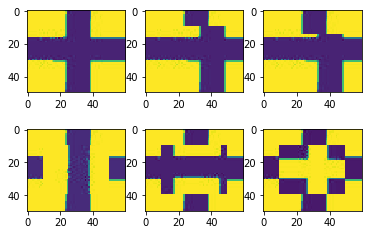

In [53]:
for i in range (0,6):
    plt.subplot(2,3,i+1)
    plt.imshow(pic1[:,:,i])

Step 1, Minibatch Loss= 23431.8906, Train Accuracy= 0.625
Step 2, Minibatch Loss= 17536.1367, Train Accuracy= 0.375
Step 3, Minibatch Loss= 12016.0762, Train Accuracy= 0.125
Step 4, Minibatch Loss= 2268.2583, Train Accuracy= 0.625
Step 5, Minibatch Loss= 2471.8704, Train Accuracy= 0.625
Step 6, Minibatch Loss= 4825.1152, Train Accuracy= 0.500
Step 7, Minibatch Loss= 13181.3008, Train Accuracy= 0.375
Step 8, Minibatch Loss= 2400.7383, Train Accuracy= 0.875
Step 9, Minibatch Loss= 9082.7842, Train Accuracy= 0.500
Step 10, Minibatch Loss= 838.2172, Train Accuracy= 0.625
Step 11, Minibatch Loss= 128.4137, Train Accuracy= 0.250
Step 12, Minibatch Loss= 3219.0737, Train Accuracy= 0.875
Step 13, Minibatch Loss= 112.4143, Train Accuracy= 0.625
Step 14, Minibatch Loss= 1267.1028, Train Accuracy= 0.875
Step 15, Minibatch Loss= 11271.6035, Train Accuracy= 0.500
Step 16, Minibatch Loss= 14258.4375, Train Accuracy= 0.625
Step 17, Minibatch Loss= 6118.4375, Train Accuracy= 0.750
Step 18, Minibatch L

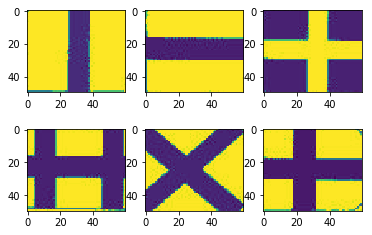

In [54]:
from con import train_cov
from an import ans_cut
import numpy as np
p,pic,a=ans_cut('59')
w1,w2=train_cov(np.array(a)[70:150,90:170,0])

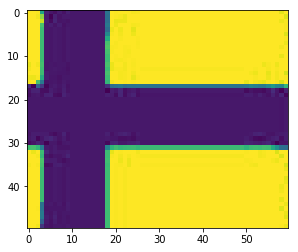

In [55]:
plt.imshow(p)

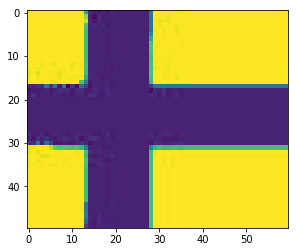

In [57]:
p=np.array(a)[100:150,100:160,0]
plt.imshow(p)

In [58]:
I1,II2=forward(p,pic1,w1,w2)
compare(I1,II2)

(array([326.36415858, 460.02224876, 386.22892924, 407.7968631 ,
        484.22512924, 545.54227429]),
 array([ 11.94132329,  10.87966058, -21.51369289, -43.30434685,
        242.45699453, 256.61360998]))

In [59]:
I1,II2=forward(p,pic,w1,w2)
compare(I1,II2)

(array([490.95532995, 309.50561211, 366.29609147, 459.10441608,
        407.30195054, 220.06245953]),
 array([-225.44562978, -138.85777767, -176.56782233,   57.48733064,
         -87.4435627 ,   13.05830034]))

Step 1, Minibatch Loss= 56805.9219, Train Accuracy= 0.500
Step 2, Minibatch Loss= 1727.8962, Train Accuracy= 0.875
Step 3, Minibatch Loss= 5083.6025, Train Accuracy= 0.875
Step 4, Minibatch Loss= 5362.9551, Train Accuracy= 0.750
Step 5, Minibatch Loss= 4391.4941, Train Accuracy= 0.375
Step 6, Minibatch Loss= 764.5894, Train Accuracy= 0.125
Step 7, Minibatch Loss= 88.4303, Train Accuracy= 0.875
Step 8, Minibatch Loss= 5181.9810, Train Accuracy= 0.750
Step 9, Minibatch Loss= 9281.6484, Train Accuracy= 0.125
Step 10, Minibatch Loss= 808.1885, Train Accuracy= 0.375
Step 11, Minibatch Loss= 10723.5859, Train Accuracy= 0.375
Step 12, Minibatch Loss= 2178.1853, Train Accuracy= 0.750
Step 13, Minibatch Loss= 12953.8301, Train Accuracy= 0.250
Step 14, Minibatch Loss= 1784.8955, Train Accuracy= 0.750
Step 15, Minibatch Loss= 10771.2871, Train Accuracy= 0.750
Step 16, Minibatch Loss= 6178.1616, Train Accuracy= 0.625
Step 17, Minibatch Loss= 339.3030, Train Accuracy= 0.875
Step 18, Minibatch Loss=

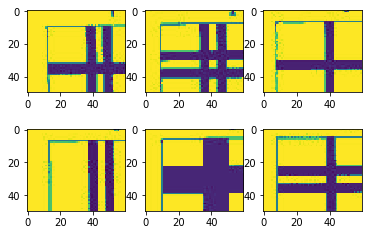

In [86]:
from con import train_cov
from an import ans_cut
import numpy as np
p,pic,a=ans_cut('67')
w1,w2=train_cov(np.array(a)[70:150,90:170,0])

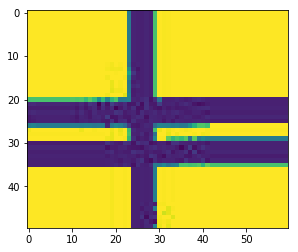

In [84]:
plt.imshow(p)

In [88]:
I1,II2=forward(p,pic,w1,w2)
compare(I1,II2)

(array([439.14570101, 724.9523735 , 342.59076332, 492.61376153,
        696.28347502, 254.56689338]),
 array([213.97884691, 317.72318651, 199.04176791, 280.52843961,
         78.53695401,  67.74825391]))

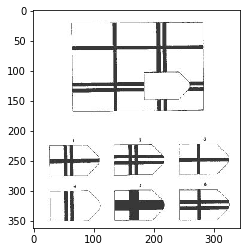

In [89]:
plt.imshow(np.array(a))

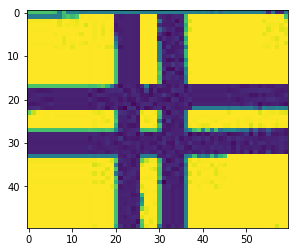

In [90]:
b=pic[:,:,1].copy()
plt.imshow(b)

In [97]:
b[10:40,10:50]

array([[255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       ...,
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [254., 254., 254., ..., 255., 255., 255.]])

In [9]:
b=pic[:,:,1].copy()
b[10:40,10:50]=pic[:,:,0][10:40,10:50]
c=pic[:,:,1].copy()
c[10:40,10:50]=pic[:,:,2][10:40,10:50]
d=pic[:,:,1].copy()
d[10:40,10:50]=pic[:,:,3][10:40,10:50]
e=pic[:,:,1].copy()
e[10:40,10:50]=pic[:,:,4][10:40,10:50]
f=pic[:,:,1].copy()
f[10:40,10:50]=pic[:,:,5][10:40,10:50]
pic1=np.zeros((50,60,6))
pic1[:,:,0]=pic[:,:,1]
pic1[:,:,1]=b
pic1[:,:,2]=c
pic1[:,:,3]=d
pic1[:,:,4]=e
pic1[:,:,5]=f

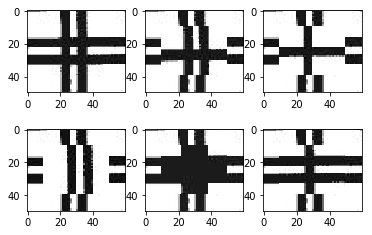

In [12]:
for i in range (0,6):
    plt.subplot(2,3,i+1)
    plt.imshow(pic1[:,:,i],cmap='gray')

In [100]:
I1,II2=forward(p,pic1,w1,w2)
compare(I1,II2)

(array([724.9523735 , 685.37230257, 678.23546359, 801.20149005,
        746.05520616, 552.23892184]),
 array([317.72318651, 487.4036622 , 457.76463995, 512.57227756,
        346.40511352, 245.5758563 ]))

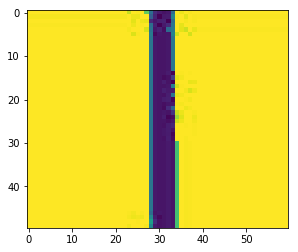

In [114]:
plt.imshow(np.array(a)[66:116,105:165,0])

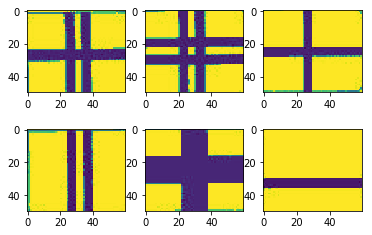

In [24]:
import matplotlib.pyplot as plt
from PIL import Image
import os
import sys
import random
import math
import re
import time
import numpy as np
def ans_cut(N):
    a=Image.open('/Users/sofiadunlosky/Downloads/ilovepdf_images-extracted/img'+N+'.jpg')
    pic=np.zeros((50,60,6))
    n=13
    m=-2
    m1=1
    pic[:,:,0]=np.array(a)[225+m:275+m,15+n:75+n,0]
    pic[:,:,3]=np.array(a)[298+m1:348+m1,15+n:75+n,0]
    pic[:,:,1]=np.array(a)[225+m:275+m,125+n:185+n,0]
    pic[:,:,4]=np.array(a)[298+m1:348+m1,125+n:185+n,0]
    pic[:,:,2]=np.array(a)[225+m:275+m,235+n:295+n,0]
    pic[:,:,5]=np.array(a)[298+m1:348+m1,235+n:295+n,0]
    p=np.array(a)[100:150,110:170,0]
    for i in range (0,6):
        plt.subplot(2,3,i+1)
        plt.imshow(pic[:,:,i])
    return p,pic,a
p,pic,a=ans_cut('67')
plt.imshow(np.array(a)[66:116,105:165,0])
plt.imshow(np.array(a)[30:80,70:130,0])
p=np.zeros((50,60,2))
p[:,:,0]=np.array(a)[66:116,105:165,0]
p[:,:,1]=np.array(a)[30:80,70:130,0]

In [4]:
from con1 import train_cov
#from an import ans_cut
import numpy as np
#p,pic,a=ans_cut('43')
w1,w2=train_cov(p)

Step 1, Minibatch Loss= 614.0098, Train Accuracy= 0.000
Step 2, Minibatch Loss= 0.0000, Train Accuracy= 1.000


In [10]:
p=np.array(a)[100:150,110:170,0]
I1,II2=forward(p,pic1,w1,w2)
compare(I1,II2)

(array([615.61252782, 922.31619878, 754.5379858 , 801.60819271,
        608.14697851, 630.71107449]),
 array([248.63629161, 683.85408721, 446.29344134, 489.0780045 ,
        301.26951181, 362.3635192 ]))

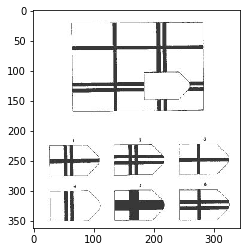

In [11]:
plt.imshow(a)

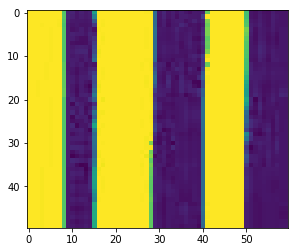

In [27]:
plt.imshow(p)

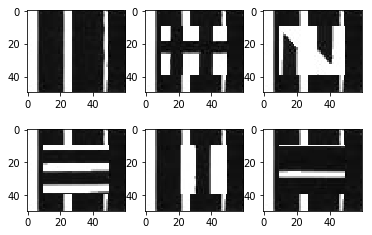

In [32]:
b=pic[:,:,0].copy()
b[10:40,10:50]=pic[:,:,1][10:40,10:50]
c=pic[:,:,0].copy()
c[10:40,10:50]=pic[:,:,2][10:40,10:50]
d=pic[:,:,0].copy()
d[10:40,10:50]=pic[:,:,3][10:40,10:50]
e=pic[:,:,0].copy()
e[10:40,10:50]=pic[:,:,4][10:40,10:50]
f=pic[:,:,0].copy()
f[10:40,10:50]=pic[:,:,5][10:40,10:50]
pic1=np.zeros((50,60,6))
pic1[:,:,0]=pic[:,:,0]
pic1[:,:,1]=b
pic1[:,:,2]=c
pic1[:,:,3]=d
pic1[:,:,4]=e
pic1[:,:,5]=f
for i in range (0,6):
    plt.subplot(2,3,i+1)
    plt.imshow(pic1[:,:,i],cmap='gray')

In [53]:
from con1 import train_cov
#from an import ans_cut
import numpy as np
#p,pic,a=ans_cut('43')
w1,w2=train_cov(p)

Step 1, Minibatch Loss= 0.0000, Train Accuracy= 1.000


In [56]:
#p=np.array(a)[100:150,110:170,0]
I1,II2=forward(p,pic1,w1,w2)
compare(I1,II2)

(array([1892.54976183, 1282.20954081, 1377.81905143, 1524.83681951,
        1538.33856337, 1844.45504668]),
 array([-1668.0573114 ,  -199.6516052 ,  -670.46077332,  -133.62765854,
         -821.97386885, -1158.37647031]))

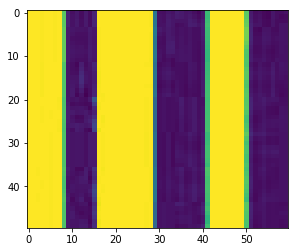

In [50]:
plt.imshow(np.array(a)[20:70,251:311])
plt.imshow(np.array(a)[20:70,110:170])
p=np.zeros((50,60,2))
p[:,:,0]=np.array(a)[20:70,251:311]
p[:,:,1]=np.array(a)[20:70,110:170]

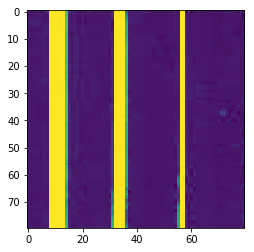

In [65]:
p=np.array(a)[15:95,170:250]
plt.imshow(p)

In [59]:
#p=np.array(a)[100:150,110:170,0]
I1,II2=forward(p,pic1,w1,w2)
compare(I1,II2)

(array([1511.36436311, 2323.24985292, 2467.20168832, 2279.39471039,
        2002.2176768 , 1911.5458416 ]),
 array([-488.03333571,  980.37237048,  509.56320236, 1046.39631714,
         358.05010683,   21.64750537]))

In [66]:
from con import train_cov
#from an import ans_cut
import numpy as np
#p,pic,a=ans_cut('43')
w1,w2=train_cov(p)

Step 1, Minibatch Loss= 38421.8789, Train Accuracy= 0.375
Step 2, Minibatch Loss= 6893.5601, Train Accuracy= 0.875
Step 3, Minibatch Loss= 3743.0574, Train Accuracy= 0.625
Step 4, Minibatch Loss= 3937.5750, Train Accuracy= 0.750
Step 5, Minibatch Loss= 3529.8022, Train Accuracy= 0.375
Step 6, Minibatch Loss= 4833.2202, Train Accuracy= 0.750
Step 7, Minibatch Loss= 0.0502, Train Accuracy= 1.000


In [68]:
#p=np.array(a)[100:150,110:170,0]
I1,II2=forward(np.array(a)[20:70,221:281],pic1,w1,w2)
compare(I1,II2)

(array([ 832.49748841, 1102.05628125, 1069.43409278, 1169.70031986,
         860.40775141, 1034.62538031]),
 array([-89.18250041, 203.3372533 , 297.28315665, 198.978362  ,
        109.72728751, 185.87282365]))

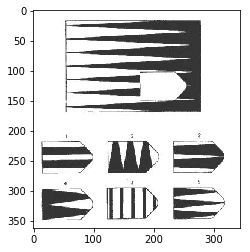

In [83]:
plt.imshow(a)

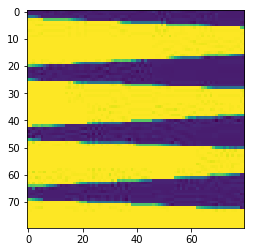

In [86]:
plt.imshow(np.array(a)[70:150,90:170,0])

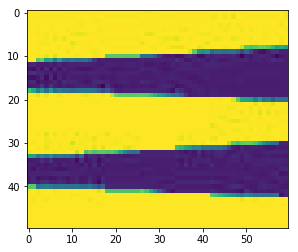

In [91]:
plt.imshow(p)

In [87]:
from con import train_cov
#from an import ans_cut
import numpy as np
#p,pic,a=ans_cut('43')
w1,w2=train_cov(np.array(a)[70:150,90:170,0])

Step 1, Minibatch Loss= 58394.7539, Train Accuracy= 0.625
Step 2, Minibatch Loss= 93421.6016, Train Accuracy= 0.375
Step 3, Minibatch Loss= 13721.1084, Train Accuracy= 0.875
Step 4, Minibatch Loss= 13804.0254, Train Accuracy= 0.625
Step 5, Minibatch Loss= 24455.1016, Train Accuracy= 0.750
Step 6, Minibatch Loss= 45624.2109, Train Accuracy= 0.250
Step 7, Minibatch Loss= 29980.4766, Train Accuracy= 0.625
Step 8, Minibatch Loss= 221.7762, Train Accuracy= 0.875
Step 9, Minibatch Loss= 10766.2031, Train Accuracy= 0.125
Step 10, Minibatch Loss= 2549.2063, Train Accuracy= 0.375
Step 11, Minibatch Loss= 2281.8542, Train Accuracy= 0.750
Step 12, Minibatch Loss= 7762.6514, Train Accuracy= 0.875
Step 13, Minibatch Loss= 64391.0273, Train Accuracy= 0.500
Step 14, Minibatch Loss= 32748.7148, Train Accuracy= 0.500
Step 15, Minibatch Loss= 8744.3008, Train Accuracy= 0.750
Step 16, Minibatch Loss= 69102.9844, Train Accuracy= 0.500
Step 17, Minibatch Loss= 5118.2241, Train Accuracy= 0.625
Step 18, Mini

In [88]:
I1,II2=forward(p,pic,w1,w2)
compare(I1,II2)

(array([ 478.9143363 ,  569.37418036,  437.65244781,  626.62009445,
        1132.60204746,  475.54242333]),
 array([309.46217671,  29.39963416, 156.44591099, 405.01919879,
        906.93972817, 210.93751217]))

In [7]:
from con1 import train_cov
#from an import ans_cut
import numpy as np
#p,pic,a=ans_cut('43')
m=[0,2,5]
w1,w2=train_cov(pic)

Step 1, Minibatch Loss= 89722.4219, Train Accuracy= 0.000
Step 2, Minibatch Loss= 20466.3379, Train Accuracy= 0.000
Step 3, Minibatch Loss= 68303.9688, Train Accuracy= 0.000
Step 4, Minibatch Loss= 56291.1562, Train Accuracy= 0.000
Step 5, Minibatch Loss= 0.0000, Train Accuracy= 1.000


In [8]:
I1,II2=forward(p,pic,w1,w2)
compare(I1,II2)

(array([ 839.32858295, 1762.22619314, 1152.53225966, 1785.37016638,
        1460.25154773, 1754.20824716]),
 array([ -114.04309704, -1456.18582634,  -602.30622736, -1491.35491138,
        -1412.80491047,  -837.41373628]))

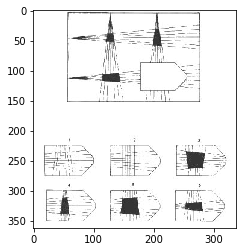

In [7]:
plt.imshow(a)

In [10]:
from con import train_cov
#from an import ans_cut
import numpy as np
#p,pic,a=ans_cut('43')
w1,w2=train_cov(np.array(a)[70:150,90:170,0])

Step 1, Minibatch Loss= 4728.6904, Train Accuracy= 0.750
Step 2, Minibatch Loss= 132065.4844, Train Accuracy= 0.500
Step 3, Minibatch Loss= 19519.0137, Train Accuracy= 0.625
Step 4, Minibatch Loss= 18872.7891, Train Accuracy= 0.875
Step 5, Minibatch Loss= 34855.2305, Train Accuracy= 0.250
Step 6, Minibatch Loss= 98568.7266, Train Accuracy= 0.625
Step 7, Minibatch Loss= 43325.7148, Train Accuracy= 0.750
Step 8, Minibatch Loss= 57813.0781, Train Accuracy= 0.750
Step 9, Minibatch Loss= 10415.2090, Train Accuracy= 0.250
Step 10, Minibatch Loss= 3748.8081, Train Accuracy= 0.750
Step 11, Minibatch Loss= 76176.0547, Train Accuracy= 0.375
Step 12, Minibatch Loss= 125678.0625, Train Accuracy= 0.375
Step 13, Minibatch Loss= 46040.9609, Train Accuracy= 0.125
Step 14, Minibatch Loss= 188345.3750, Train Accuracy= 0.375
Step 15, Minibatch Loss= 39191.5703, Train Accuracy= 0.625
Step 16, Minibatch Loss= 45409.6914, Train Accuracy= 0.750
Step 17, Minibatch Loss= 19633.3750, Train Accuracy= 0.750
Step 

In [12]:
from forw import forward,compare
I1,II2=forward(p,pic,w1,w2)
compare(I1,II2)

(array([1075.05099485, 1340.15209923, 1814.65150916, 1448.3397054 ,
        1838.65412836, 1375.87922838]),
 array([ 31.05480161, 207.54895804,  69.28880067,  82.09868931,
        107.95839905, 169.152544  ]))

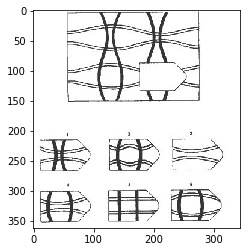

In [21]:
plt.imshow(a)

In [19]:
from con import train_cov
#from an import ans_cut
import numpy as np
#p,pic,a=ans_cut('43')
w1,w2=train_cov(np.array(a)[70:150,90:170,0])

Step 1, Minibatch Loss= 72800.4375, Train Accuracy= 0.625
Step 2, Minibatch Loss= 22675.3262, Train Accuracy= 0.750
Step 3, Minibatch Loss= 26838.4082, Train Accuracy= 0.750
Step 4, Minibatch Loss= 39116.1562, Train Accuracy= 0.750
Step 5, Minibatch Loss= 0.0000, Train Accuracy= 1.000
Step 6, Minibatch Loss= 0.0000, Train Accuracy= 1.000


In [20]:
from forw import forward,compare
I1,II2=forward(p,pic,w1,w2)
compare(I1,II2)

(array([1279.83733502,  807.44492661,  732.47918721, 1052.98036738,
         709.65777291, 1103.18224253]),
 array([647.0115961 , -99.25763639, 101.53629255, 699.84376925,
        186.56451199, 211.41779494]))